In [1]:
from keras import models, layers
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import math
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
priceAMC = pd.read_json("1dAMC.json")
priceAMC = priceAMC.filter(['AMC'])

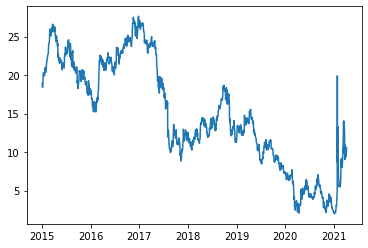

In [3]:
plt.plot(priceAMC)
plt.show()

In [4]:
#convert to numpy array
data_array = priceAMC.values
#using an 80/20 training/testing split
train_data_len = math.ceil(len(data_array)* .8)
train_data_len

1260

In [5]:
#scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(data_array)
scaled

array([[0.65962148],
       [0.64064798],
       [0.64639751],
       ...,
       [0.28770269],
       [0.33643283],
       [0.31732672]])

In [6]:
train_data = scaled[0:train_data_len,:]
x_train = []
y_train = []
# IMPORTANT lookback interval, LSTM use lookback memory for time start with 15
for i in range(15, len(train_data)):
    x_train.append(train_data[i-15:i, 0])
    y_train.append(train_data[i, 0])
    if i<=16:
        print(x_train)
        print(y_train)
        print()

[array([0.65962148, 0.64064798, 0.64639751, 0.65818424, 0.66537108,
       0.69526899, 0.71309286, 0.70935564, 0.71165548, 0.70734312,
       0.70073113, 0.69871883, 0.70303097, 0.7211423 , 0.73637865])]
[0.7412657160580454]

[array([0.65962148, 0.64064798, 0.64639751, 0.65818424, 0.66537108,
       0.69526899, 0.71309286, 0.70935564, 0.71165548, 0.70734312,
       0.70073113, 0.69871883, 0.70303097, 0.7211423 , 0.73637865]), array([0.64064798, 0.64639751, 0.65818424, 0.66537108, 0.69526899,
       0.71309286, 0.70935564, 0.71165548, 0.70734312, 0.70073113,
       0.69871883, 0.70303097, 0.7211423 , 0.73637865, 0.74126572])]
[0.7412657160580454, 0.7415532518032466]



In [7]:
#convert all ot numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape arrays to 3d 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1245, 15, 1)

In [8]:
#build RNN1
model = models.Sequential()
model.add(layers.LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(layers.LSTM(50))
model.add(layers.Dense(12))
model.add(layers.Dense(1, activation= 'tanh'))

In [9]:
#leave one RNN model uncommented to run 
# #build RNN2
# model = models.Sequential()
# model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1],1)))
# model.add(layers.LSTM(100, recurrent_dropout=0.2))
# model.add(layers.Dense(12))
# model.add(layers.Dense(1, activation= 'tanh'))

In [10]:
#leave one RNN model uncommented to run
# #build RNN3
# model = models.Sequential()
# model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1],1)))
# model.add(layers.LSTM(100, return_sequences=True, recurrent_dropout=0.2))
# model.add(layers.LSTM(100))
# model.add(layers.Dense(1, activation= 'sigmoid'))

In [11]:
#leave one RNN model uncommented to run
# #build RNN4
# model = models.Sequential()
# model.add(layers.LSTM(200, return_sequences=True, input_shape=(x_train.shape[1],1)))
# model.add(layers.LSTM(200, recurrent_dropout=0.2))
# model.add(layers.Dense(6))
# model.add(layers.Dense(1, activation= 'relu'))

In [12]:
#compile
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#train
model.fit(x_train, y_train, batch_size=3, epochs=15)

Epoch 1/15
415/415 [==============================] - 7s 7ms/step - loss: 0.0119
Epoch 2/15
415/415 [==============================] - 3s 7ms/step - loss: 0.0019
Epoch 3/15
415/415 [==============================] - 3s 7ms/step - loss: 0.0015
Epoch 4/15
415/415 [==============================] - 3s 8ms/step - loss: 9.4474e-04
Epoch 5/15
415/415 [==============================] - 3s 8ms/step - loss: 8.0552e-04
Epoch 6/15
415/415 [==============================] - 3s 7ms/step - loss: 7.7158e-04
Epoch 7/15
415/415 [==============================] - 3s 8ms/step - loss: 6.5598e-04
Epoch 8/15
415/415 [==============================] - 3s 7ms/step - loss: 6.2775e-04
Epoch 9/15
415/415 [==============================] - 3s 8ms/step - loss: 5.9085e-04
Epoch 10/15
415/415 [==============================] - 3s 8ms/step - loss: 5.2921e-04
Epoch 11/15
415/415 [==============================] - 3s 7ms/step - loss: 5.4131e-04
Epoch 12/15
415/415 [==============================] - 3s 7ms/step - loss: 

In [14]:
test_data = scaled[train_data_len - 15:, :]
#create the data sets x_test and y_test
x_test = []
y_test = data_array[train_data_len:, :]
for i in range(15, len(test_data)):
    x_test.append(test_data[i-15:i, 0])

In [15]:
#convert the data to array
x_test = np.array(x_test)

#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
#get the models' predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

1.254236230313943

In [18]:
#Get the mean average percentage error (MAPE)
mape = ((1/len(y_test))*(np.sum((predictions - y_test)/y_test))*100)
mape

15.770251403388077

<ipython-input-19-072b5487e39b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


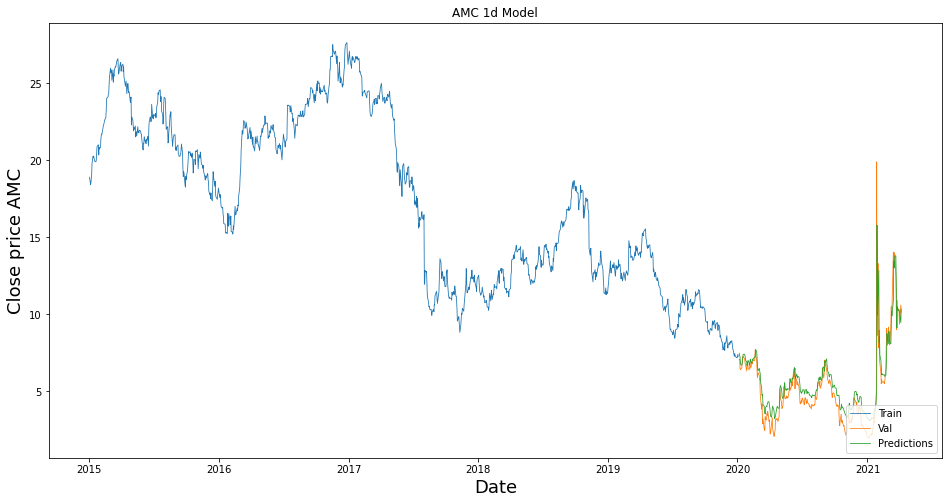

In [19]:
#Plot the data
train = priceAMC[:train_data_len]
valid = priceAMC[train_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('AMC 1d Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price AMC', fontsize=18)
plt.plot(train['AMC'],linewidth=0.8)
plt.plot(valid,linewidth=0.8)
plt.legend(['Train', 'Val', 'Predictions'], loc= 'lower right')
plt.show()

In [20]:
#Save the model! serialise to json
model_AMC_json = model.to_json()
with open("Model_AMC.json", "w") as json_file:
    json_file.write(model_AMC_json)
#Save the serialised weights
model.save_weights("Model_AMC.h5")
print ("Saved modelAMC to disk")

Saved modelAMC to disk


In [21]:
from keras import models

In [22]:
#Load saved model and saved weights so as to not train again
json_file = open("Model_AMC.json", 'r')
loaded_model_AMC_json = json_file.read()
json_file.close()
loaded_model_AMC = models.model_from_json(loaded_model_AMC_json)
# load weights into new model
loaded_model_AMC.load_weights("Model_AMC.h5")
print("Loaded modelAMC from disk")

Loaded modelAMC from disk


In [23]:
#Compile loaded model
loaded_model_AMC.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
loaded_model_AMC.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 15, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 12)                612       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 31,225
Trainable params: 31,225
Non-trainable params: 0
_________________________________________________________________
